In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #benzerlik skoru
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:

df = pd.read_csv("air-traffic-passenger-statistics.csv")

In [4]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [3]:
df.tail()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804
18884,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Enplaned,Other,International,A,1243


# Sefer Sayısına Göre

In [4]:
df["Operating Airline"].nunique()

89

In [5]:
#x = df["Operating Airline"].value_counts()
data1= df["Operating Airline"]
data1.tail()


18880              WOW Air
18881     WestJet Airlines
18882     WestJet Airlines
18883    XL Airways France
18884    XL Airways France
Name: Operating Airline, dtype: object

In [6]:
data2= pd.DataFrame(data1.value_counts()).reset_index()
data2.columns =["Operating Airline", "counts",]
data2.sort_values(by = "counts" , ascending = False)
data2_old  = data2
data2
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
#üstteki sitede nasıl yaptığımı anlatıyor

,Operating Airline,counts
0,United Airlines - Pre 07/01/2013,2154
1,United Airlines,1653
2,SkyWest Airlines,1212
3,Alaska Airlines,891
4,Virgin America,462
...,...,...
84,Xtra Airways,2
85,Evergreen International Airlines,2
86,Pacific Aviation,2
87,Icelandair EHF,2


In [7]:
data2 = pd.get_dummies(data2 , drop_first = True)
data2

,counts,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,...,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways
0,2154,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1653,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1212,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,891,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,462,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
85,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


number of cluster 2, silhouette 0.8576073770666279
number of cluster 3, silhouette 0.743399859264219
number of cluster 4, silhouette 0.7599751988094154
number of cluster 5, silhouette 0.7490050740395996
number of cluster 6, silhouette 0.6817789870261783
number of cluster 7, silhouette 0.6765615322628483
number of cluster 8, silhouette 0.6699161343646498
number of cluster 9, silhouette 0.7019468235123535
number of cluster 10, silhouette 0.6938535115040583


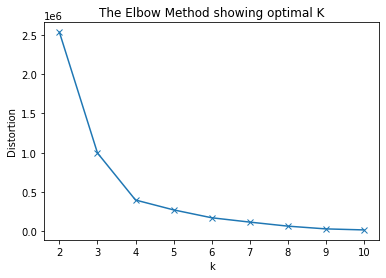

In [8]:

def cluster(x,clusters):
    allscore=[]
    allclusters=[]
    sum_of_squared_distances = []
    x=x
    for i in np.arange(1,clusters):

          i+=1
          model=KMeans(n_clusters=i)
          pred=model.fit_predict(x)
          s_score = silhouette_score(x,pred)
          score=silhouette_score(x,pred)
          print("number of cluster {}, silhouette {}".format(i,score))
          allscore.append(s_score)
          allclusters.append(i)
          sum_of_squared_distances.append(model.inertia_)

    plt.plot(allclusters,sum_of_squared_distances, marker='x')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing optimal K')
    plt.show()

cluster(data2,10)

Burada gördüğümüz üzere 4 adet cluster yapılabilir.

In [9]:
model = KMeans(n_clusters = 4)

model = model.fit(data2)

pred = model.predict(data2)

No handles with labels found to put in legend.


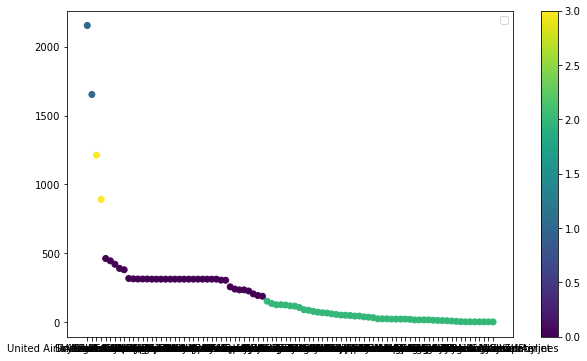

In [10]:
plt.figure(figsize = (10,6))  
plt.scatter(data2_old["Operating Airline"],data2["counts"] , c = pred)
plt.legend()
plt.colorbar()
plt.show() 

# Yolcu Sayısına Göre

In [11]:
data3= df[["Operating Airline","Passenger Count"]]
data3.tail()

,Operating Airline,Passenger Count
18880,WOW Air,50
18881,WestJet Airlines,10868
18882,WestJet Airlines,11664
18883,XL Airways France,804
18884,XL Airways France,1243


In [12]:
data3 = data3.groupby("Operating Airline")["Passenger Count"].sum()

In [13]:
data3= pd.DataFrame(data3).reset_index()
data3.columns =["Operating Airline", "number of passenger"]
data3

,Operating Airline,number of passenger
0,ABC Aerolineas S.A. de C.V. dba Interjet,15585
1,ATA Airlines,384764
2,Aer Lingus,777691
3,Aeromexico,1672946
4,Air Berlin,235155
...,...,...
84,WOW Air,295168
85,WestJet Airlines,799801
86,World Airways,785
87,XL Airways France,118961


In [14]:
data3.sort_values(ascending = False , by ="number of passenger" )

,Operating Airline,number of passenger
79,United Airlines,112640408
80,United Airlines - Pre 07/01/2013,105363917
68,SkyWest Airlines,44582356
16,American Airlines,43622387
81,Virgin America,37843920
...,...,...
88,Xtra Airways,146
18,Ameriflight,110
21,"Atlas Air, Inc",68
23,Boeing Company,18


In [15]:
data3_dummy = pd.get_dummies(data3 , drop_first = True)

number of cluster 2, silhouette 0.9286009000222435
number of cluster 3, silhouette 0.9124445061202552
number of cluster 4, silhouette 0.8270891153840719
number of cluster 5, silhouette 0.7267852126085675
number of cluster 6, silhouette 0.7269693551562721
number of cluster 7, silhouette 0.7255446044629339
number of cluster 8, silhouette 0.7372228666673278
number of cluster 9, silhouette 0.7192917610810347
number of cluster 10, silhouette 0.7107647656917457


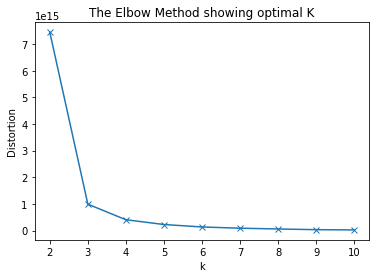

In [16]:
cluster(data3_dummy , 10)

4 seçme sebebimiz : 4 gruptan fazlasında silüet skoru değişimi az olduğu  için grup yani cluster sayısı 4 olmalıdır

In [21]:
model = KMeans(n_clusters = 4)

model = model.fit(data3_dummy)

pred = model.predict(data3_dummy)

No handles with labels found to put in legend.


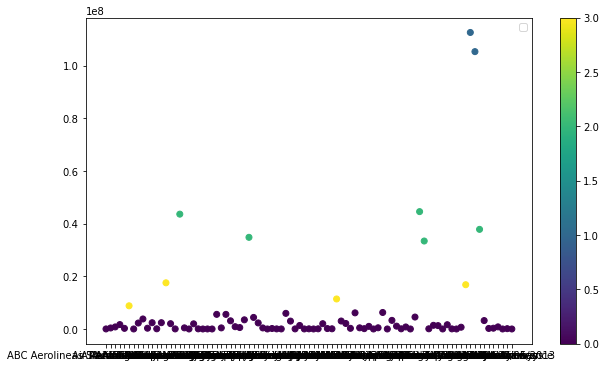

In [22]:
plt.figure(figsize = (10,6))  
plt.scatter(data3["Operating Airline"],data3["number of passenger"] , c = pred)
plt.legend()
plt.colorbar()
plt.show()